In [1]:
import os
os.chdir(os.getcwd().replace('/Code', ''))

In [2]:
import functions
import pandas as pd
import gzip
import pickle as pkl
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns

In [3]:
with gzip.open('Matrices/CVs_FINALE.pkl.gz', 'rb') as f:
        CVs = pkl.load(f)
CVs.shape

(8086, 3)

In [4]:
joincv = [" ".join(CVs.loc[cv]['vocab_cv_list']) for cv in CVs.index]

In [5]:
colors = ['#e6194B', '#f58231', '#ffe119', '#bfef45', "#3cb44b", "#42d4f4", "#4363d8", "#911eb4", "#f032e6", "#a9a9a9", "pink","yellow",'blue','green', 'black','grey',"#454455", "#787878","#121211","#333333"]

## Matrice d'occurrences

In [6]:
vectorizer = CountVectorizer(token_pattern="[\S]+")
X = vectorizer.fit_transform(joincv)
DataFrame_Count= pd.DataFrame(X.toarray(),  columns=vectorizer.get_feature_names(), index=CVs.index)
print("Le vocabulaire retenu contient", DataFrame_Count.shape[1], "tokens pour", DataFrame_Count.shape[0], 'cv.')

Le vocabulaire retenu contient 22144 tokens pour 8086 cv.


In [7]:
with gzip.open('Matrices/Matrice_count.pkl.gz', 'wb') as f:
    pkl.dump(DataFrame_Count, f)

In [8]:
def recherche_mot(mot):
    try :
        df_mot = DataFrame_Count[DataFrame_Count[mot]>0][mot]
        nb_CV = df_mot.astype('bool').sum()
        nb_occ_tot = df_mot.sum()
        ids_cv_contenant_mot_sort = list(df_mot.sort_values().index)
        pct_CV = nb_CV / DataFrame_Count.shape[0] *100
        return nb_CV, pct_CV, nb_occ_tot, ids_cv_contenant_mot_sort
    except:
        print('Le mot', mot, "n'existe pas dans la base")

In [15]:
def stat_liste_mots(liste_mots):
    res = []
    col = '#FF5733'
    for mot in liste_mots:
        r_mot = recherche_mot(mot)
        if r_mot!=None:
            res.append([mot,r_mot[0], r_mot[1], r_mot[2]])
    df = pd.DataFrame(res, columns=["mot", "nb_CV", "pct_CV", "nb_occ_tot"])
    df_sort_pct_CV = df.sort_values(by='pct_CV', ascending=False)
    # Plot Word Count and Weights of Topic Keywords
    plt.figure(figsize=(10, 10))
    plt.subplot(2,1,1)
    plt.bar(x='mot', height="pct_CV", data=df_sort_pct_CV, color=col, width=0.8, alpha=0.7)
    plt.ylabel('Pourcentage de CV contenant le mot', color=col)
    plt.title('Pourcentage de CV contenant le mot')
    
    df_sort_occ = df.sort_values(by='nb_occ_tot', ascending=False)
    plt.subplot(2,1,2)
    plt.bar(x='mot', height="nb_occ_tot", data=df_sort_occ, color=col, width=0.8, alpha=0.7)
    plt.ylabel("Nombre d'occurences", color=col)
    plt.title("Nombre d'occurences dans l'ensemble des documents")
    plt.show()
    
    

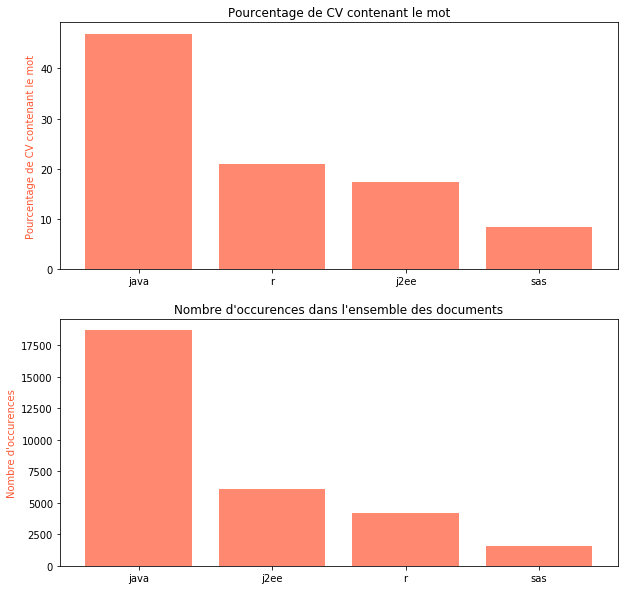

In [16]:
stat_liste_mots(['sas','r', 'java','j2ee'])

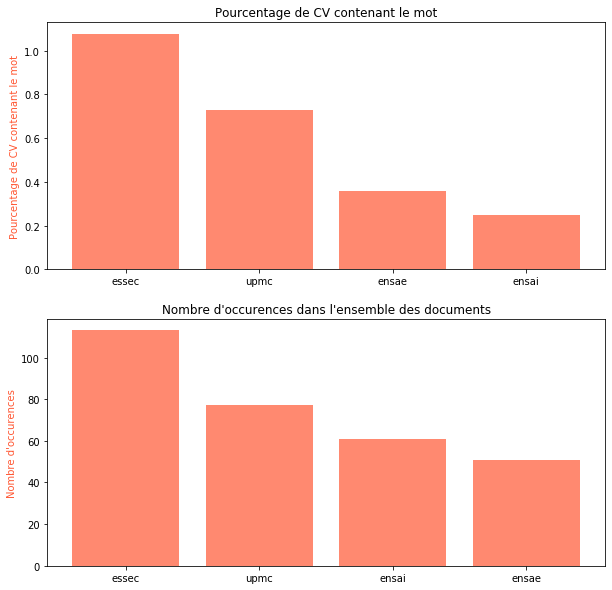

In [17]:
ecoles = ['ensai', 'ensae','essec','upmc']
stat_liste_mots(ecoles)

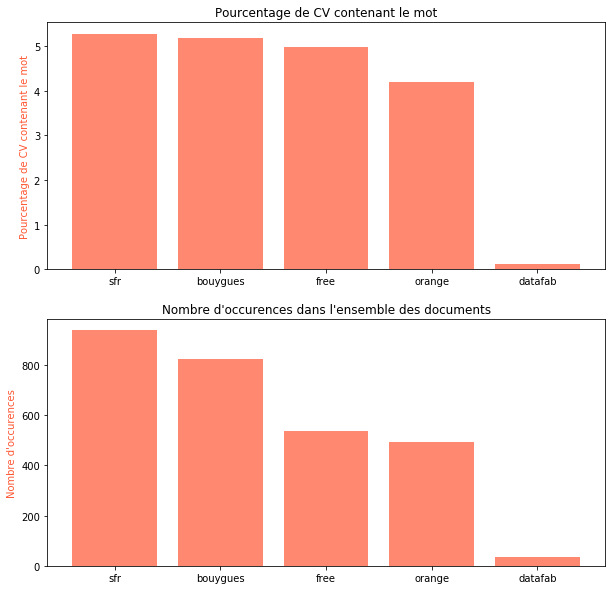

In [18]:
entreprises=['orange', 'sfr','free','datafab','bouygues']
stat_liste_mots(entreprises)